In [869]:
"""Scaling constants k1-k3"""
k1 = 160
k2 = 90
k3 = 55

#params = [0.1, 0.1, -0.1, -0.5, -0.3,0.005500, 0.2, 0.2, 2.25, 2.25, 2.25 ]

"""Alpha values"""
a1 = -0.1
a2 = -0.5
a3 = -0.3

"""Epsilon values"""
#e1 = 0.005500
e1 = 0.01
e2 = 0.2
e3 = 0.2

"""Beta values"""
b1 = 2.25
b2 = 2.25
b3 = 2.25

"""Coupling constants f"""
f1 = 0.1
f2 = 0
f3 = 0

"""Coupling constants g"""
g1 = 0.1
g2 = 0
g3 = 0

"""Coupling constants h"""
h1 = 0
h2 = 0
h3 = 0

In [870]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.legend import Legend


#params=[f1, g1, a1,a2,a3,e1,e2,e3,b1,b2,b3]
#params=[f1, g1]



def fhn(x, t):
    # constants


    V1 = x[0]
    R1 = x[1]
    V2 = x[2]
    R2 = x[3]
    V3 = x[4]
    R3 = x[5]

    dV1dt = k1*(V1 * (a1 - V1) * (V1 - 1) - R1 + f2*(V1 - V1) + h1*(V1 - V3))
    #dV1dt = k1*(V1 * (a1 - V1) * (V1 - 1) - R1) + f2*(V1-V2) + h1(V1-V3)
    dR1dt = k1*(e1 * (V1 - b1 * R1))

    dV2dt = k2*(V2 * (a2 - V2) * (V2 - 1) - R2 + f1*(V2 - V1) + g2*(V2 - V3))
    dR2dt = k2*(e2 * (V2 - b2 * R2))

    dV3dt = k3*(V3 * (a3 - V3) * (V3 - 1) - R3 + h2*(V3 - V1) + g1*(V3 - V2))
    dR3dt = k3*(e3 * (V3 - b3 * R3))
    return [dV1dt,dR1dt,dV2dt,dR2dt,dV3dt,dR3dt]


x0 = [0.1,0,0.1,0,0.1,0] # initial conditions
t = np.linspace(0,20,1000) # time
x = odeint(fhn,x0,t, args=(params,))

V1 = x[:,0]
W1 = x[:,1]
V2 = x[:,2]
W2 = x[:,3]
V3 = x[:,4]
W3 = x[:,5]

TypeError: fhn() takes 2 positional arguments but 3 were given

In [858]:
len(V1)

1000

In [859]:
V1

array([ 1.00000000e-01,  1.78151631e-01,  3.62104095e-01,  7.60511399e-01,
        9.35426127e-01,  9.21719869e-01,  8.87463564e-01,  8.46932674e-01,
        7.98740062e-01,  7.37866224e-01,  6.51619028e-01,  4.97475648e-01,
        8.65177174e-02, -4.13297522e-01, -4.39757006e-01, -4.29736885e-01,
       -4.18823021e-01, -4.07752013e-01, -3.96533495e-01, -3.85160109e-01,
       -3.73623287e-01, -3.61913534e-01, -3.50020296e-01, -3.37931772e-01,
       -3.25634686e-01, -3.13114003e-01, -3.00352564e-01, -2.87330624e-01,
       -2.74025237e-01, -2.60409464e-01, -2.46451289e-01, -2.32112130e-01,
       -2.17344774e-01, -2.02090375e-01, -1.86274038e-01, -1.69798096e-01,
       -1.52531460e-01, -1.34292081e-01, -1.14816596e-01, -9.37046682e-02,
       -7.03095660e-02, -4.35040242e-02, -1.11230448e-02,  3.15551445e-02,
        9.67479641e-02,  2.23863747e-01,  5.45157210e-01,  9.19394737e-01,
        9.49672690e-01,  9.21018621e-01,  8.85375661e-01,  8.44366964e-01,
        7.95592817e-01,  

In [860]:
len(dv1Dtlist)

NameError: name 'dv1Dtlist' is not defined

In [861]:
dv1Dtlist

NameError: name 'dv1Dtlist' is not defined

In [ ]:
params = [0, 0]
x1 = odeint(fhn, x0, t,args=(params,))

params = [1, 0]
x2 = odeint(fhn, x0, t,args=(params,))

params = [1, 1]
x3 = odeint(fhn, x0, t,args=(params,))

NameError: name 'x1' is not defined

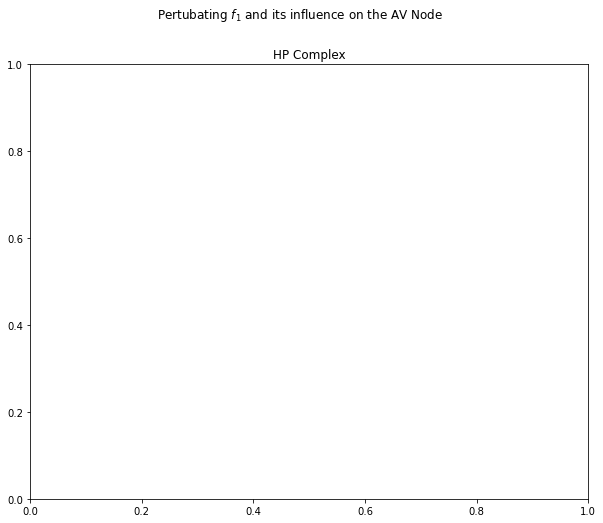

In [862]:
fig, (ax2) = plt.subplots(1,figsize=(10,8))
plt.suptitle(r'Pertubating $f_1$ and its influence on the AV Node')


"""Graph for the SA Subplot """




"""Graph for the AV Subplot"""

#ax1.title.set_text('AV')
#ax1.plot(t,x2[:,2], label=r'$f_1 = 0$', color='r', linestyle='dashed',alpha=0.3 )  # V2 label
#ax1.plot(t,x2[:,2], label=r'$f_1=0.01$', color='blue') # V2 label
#ax1.plot(t,x2[:,2], label='V2', color='orange', linestyle='dashed')  # V2 label




"""Graph for the HP Complex Subplot"""

ax2.title.set_text('HP Complex')
ax2.plot(t,x1[:,4], label=r'$g_1 = 0$', color='r', linestyle='dashed',alpha=0.3 )  # V2 label
ax2.plot(t,x3[:,4], label=r'$g_1=1$', color='blue') # V2 label
#ax2.plot(t,x3[:,4], label='V3', color='green', linestyle='dashed')  # V3 label

plt.legend()

#ax0.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
#ax1.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax2.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)

#ax0.grid(linestyle='--', linewidth=0.5)
#ax1.grid(linestyle='--', linewidth=0.5)
ax2.grid(linestyle='--', linewidth=0.5)
#ax0.ylim(-2, 2, 1)
#ax1.ylim(-2, 2, 1)
#ax2.ylim(-2, 2, 1)
plt.xlim(5, 15)


#ax1.plot(t, V2, color='r')
#ax2.plot(t, V3, color='c')




#ax0.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
#ax1.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])

fig.supylabel('Voltage (mV)')


fig.supxlabel('Time (s)')


fig.savefig('Trial_nd_error', bbox_inches="tight", dpi=300)


plt.show()

In [863]:
params= [0,0]
x1 = odeint(fhn, x0, t,args=(params,))


params = [0.01, 1]
x3 = odeint(fhn, x0, t,args=(params,))

TypeError: fhn() takes 2 positional arguments but 3 were given

NameError: name 'x1' is not defined

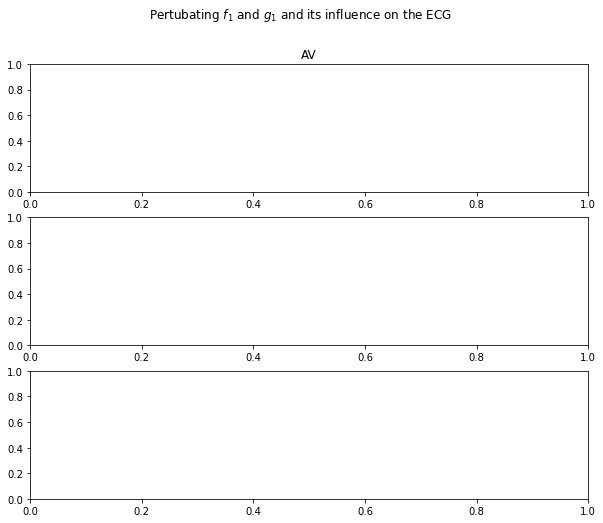

In [864]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,8))
plt.suptitle(r'Pertubating $f_1$ and $g_1$ and its influence on the ECG')

"""Graph for the AV Subplot"""


ax1.title.set_text('AV')
ax1.plot(t,x1[:,2], label=r'$f_1 = 0$', color='blue', linestyle='dashed',alpha=0.3 )  # V2 label
ax1.plot(t,x3[:,2], label=r'$f_1= 0.01$', color='red') # V2 label
"""Graph for the HP Complex Subplot"""

ax2.title.set_text('HP Complex')
ax2.plot(t,x1[:,4], label=r'$g_1 = 0$', color='blue', linestyle='dashed',alpha=0.3 )  # V2 label
ax2.plot(t,x3[:,4], label=r'$g_1=1$', color='c') # V2 label
#ax2.plot(t,x3[:,4], label='V3', color='green', linestyle='dashed')  # V3 label


"""ECG Plot """
ax3.title.set_text('HP Complex')
a = 0.1
b = 0.05
c = 0.4
ECG = a*x3[:,0]+b*x3[:,2]+c*x3[:,4]

ax3.plot(t, ECG, label=r'ECG', color='black')


ax1.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax2.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax3.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)

ax1.grid(linestyle='--', linewidth=0.5)
ax2.grid(linestyle='--', linewidth=0.5)
ax3.grid(linestyle='--', linewidth=0.5)

#ax0.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
#ax1.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
#ax2.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
fig.supylabel('Voltage (mV)')
fig.supxlabel('Time (s)')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.savefig('AV_HP_ECG_F1_FIXED_TO_0_01_G1_Varies_1', bbox_inches="tight", dpi=300)

plt.show()

a = .01
b = 0.011
c = 1



#params = [1, 0.01, -0.1, -0.1, -0.3, 0.0029, 0.1, 0.3, 2.25, 2, 2.25]

params=[f1, g1, a1,a2,a3,e1,e2,e3,b1,b2,b3]

params = [0.1, 0.1, -0.1, -0.6, -0.3,0.003900, 0.1, 0.2, 2.25, 2.25, 2.25 ]

#params = [1, 0.01, -0.1, -0.1, -0.3, 0.0029, 0.009, 0.1, 2.25, 2, 2.25]
t = np.linspace(0,20,1000) # time
x3 = odeint(fhn, x0, t,args=(params,))


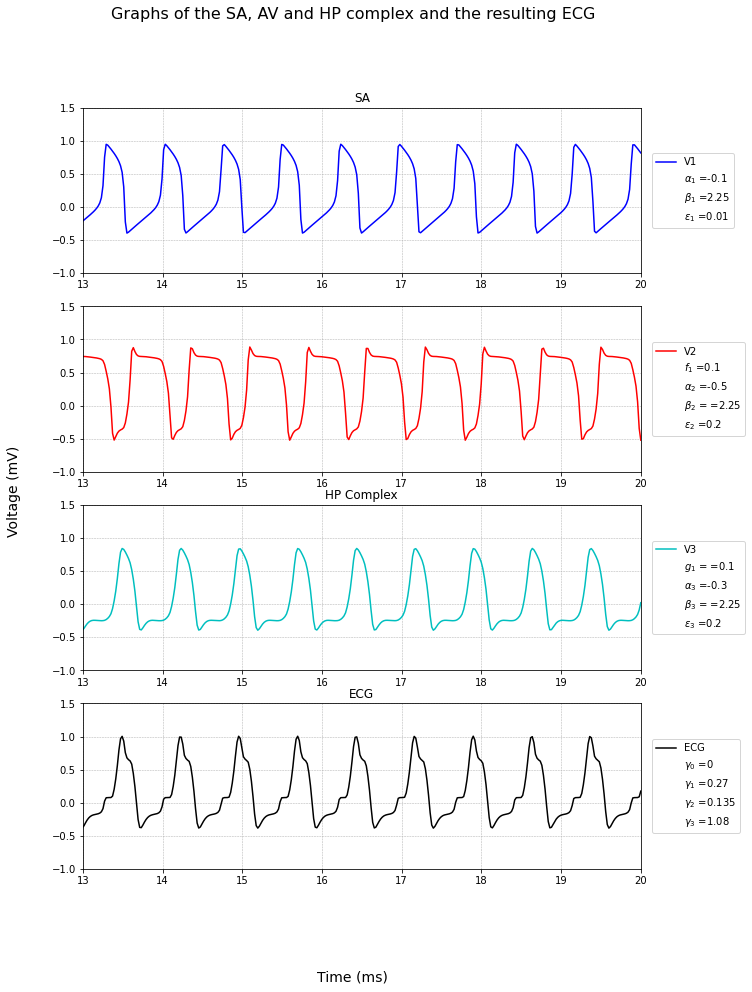

In [891]:
#params = [1, 0.01, -0.1, -0.1, -0.3, 0.0039, 0.0029, 0.2, 2.25, 2.25, 2.25]

##params = [1, 0.01, -0.1, -0.1, -0.3, 0.0039, 0.0129, 0.2, 2.55, 2.25, 2.25]

#params = [0.1, 0.1, -0.1, -0.5, -0.3,0.005500, 0.2, 0.2, 2.25, 2.25, 2.25 ]



fig, (ax4, ax5, ax6, ax7) = plt.subplots(4,figsize=(10,14))
plt.suptitle('Graphs of the SA, AV and HP complex and the resulting ECG', fontsize=16)
x10 = odeint(fhn, x0, t)

ax4.title.set_text('SA')
ax4.plot(t,x10[:,0], label=r'V1', color='blue') # V2 label
ax4.plot([ ],[ ],' ',label=r'$\alpha_1$ ={}'.format(a1))
ax4.plot([ ],[ ],' ',label=r'$\beta_1$ ={}'.format(b1))
ax4.plot([ ],[ ],' ',label=r'$\epsilon_1$ ={}'.format(e1))
"""Graph for the HP Complex Subplot"""

ax2.title.set_text('AV')
ax5.plot(t,x10[:,2], label=r'V2', color='red') # V2 label
ax5.plot([ ],[ ],' ',label=r'$f_1$ ={}'.format(f1))
ax5.plot([ ],[ ],' ',label=r'$\alpha_2$ ={}'.format(a2))
ax5.plot([ ],[ ],' ',label=r'$\beta_2$ = ={}'.format(b2))
ax5.plot([ ],[ ],' ',label=r'$\epsilon_2$ ={}'.format(e2))
#ax2.plot(t,x3[:,4], label='V3', color='green', linestyle='dashed')  # V3 label


ax6.title.set_text('HP Complex')
ax6.plot(t,x10[:,4], label=r'V3', color='c') # V2 label
ax6.plot([ ],[ ],' ',label=r'$g_1$ = ={}'.format(g1))
ax6.plot([ ],[ ],' ',label=r'$\alpha_3$ ={}'.format(a3))
ax6.plot([ ],[ ],' ',label=r'$\beta_3$ = ={}'.format(b3))
ax6.plot([ ],[ ],' ',label=r'$\epsilon_3$ ={}'.format(e3))

ax7.title.set_text('ECG')
q0 = 0
q1 = 0.1*2.7
q2 = 0.05*2.7
q3 = 0.4*2.7

ECG = q0  + q1*x10[:,0]+q2*x10[:,2]+q3*x10[:,4]

ax7.plot(t,ECG, label='ECG', color='k' )  # V3 label
ax7.plot([ ],[ ],' ',label=r'$\gamma_0$ ={}'.format(q0))
ax7.plot([ ],[ ],' ',label=r'$\gamma_1$ ={}'.format(q1))
ax7.plot([ ],[ ],' ',label=r'$\gamma_2$ ={}'.format(q2))
ax7.plot([ ],[ ],' ',label=r'$\gamma_3$ ={}'.format(q3))


ax4.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax5.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax6.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax7.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)

ax4.grid(linestyle='--', linewidth=0.5)
ax5.grid(linestyle='--', linewidth=0.5)
ax6.grid(linestyle='--', linewidth=0.5)
ax7.grid(linestyle='--', linewidth=0.5)

ax4.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax5.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax6.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax7.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])

ax4.set_xlim([13,20])
ax5.set_xlim([13,20])
ax6.set_xlim([13,20])
ax7.set_xlim([13,20])


#plt.subplots_adjust(left=0.1,
#                    bottom=0.1,
#                    right=0.9,
#                    top=0.9,
#                    wspace=0.4,
#                    hspace=0.4)
fig.supylabel('Voltage (mV)', fontsize=14)
fig.supxlabel('Time (ms)', fontsize=14)
fig.savefig('ECG_Plots', bbox_inches="tight", dpi=300)


plt.show()

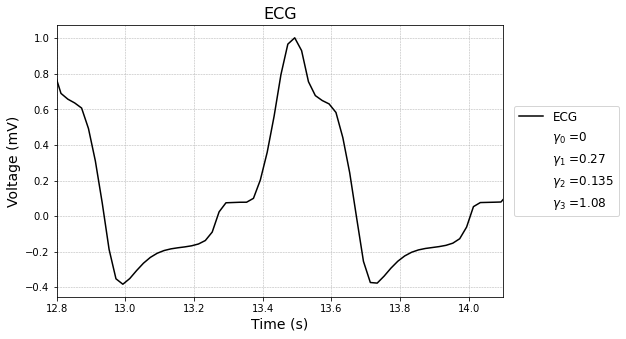

In [892]:
plt.figure(figsize=(8,5))
plt.title("ECG", fontsize=16)
plt.ylabel('Voltage (mV)' , fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.plot(t,ECG, label='ECG' ,color='black')
plt.plot([ ],[ ],' ',label='$\gamma_0$ ={}'.format(q0))
plt.plot([ ],[ ],' ',label='$\gamma_1$ ={}'.format(q1))
plt.plot([ ],[ ],' ',label='$\gamma_2$ ={}'.format(q2))
plt.plot([ ],[ ],' ',label='$\gamma_3$ ={}'.format(q3))
plt.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=6.5, fontsize=12)
plt.xlim(12.8,14.1)

plt.savefig('ECG', bbox_inches="tight", dpi=300)
